In [1]:
from src.cw_57.lab_util import *
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../../data/57/pomiary-copy.txt')
df = df.drop("l.p", 1)
df

,U[v],I[mA]
0,0.15,0.55
1,0.25,0.54
2,0.39,0.55
3,0.50,0.53
4,0.63,0.52
5,0.77,0.50
6,0.90,0.50
7,1.10,0.48
8,1.15,0.45
9,1.25,0.44


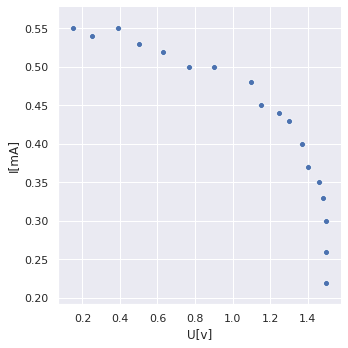

In [3]:
sns.set(style="darkgrid")
sns.relplot(x="U[v]", y="I[mA]", data=df)


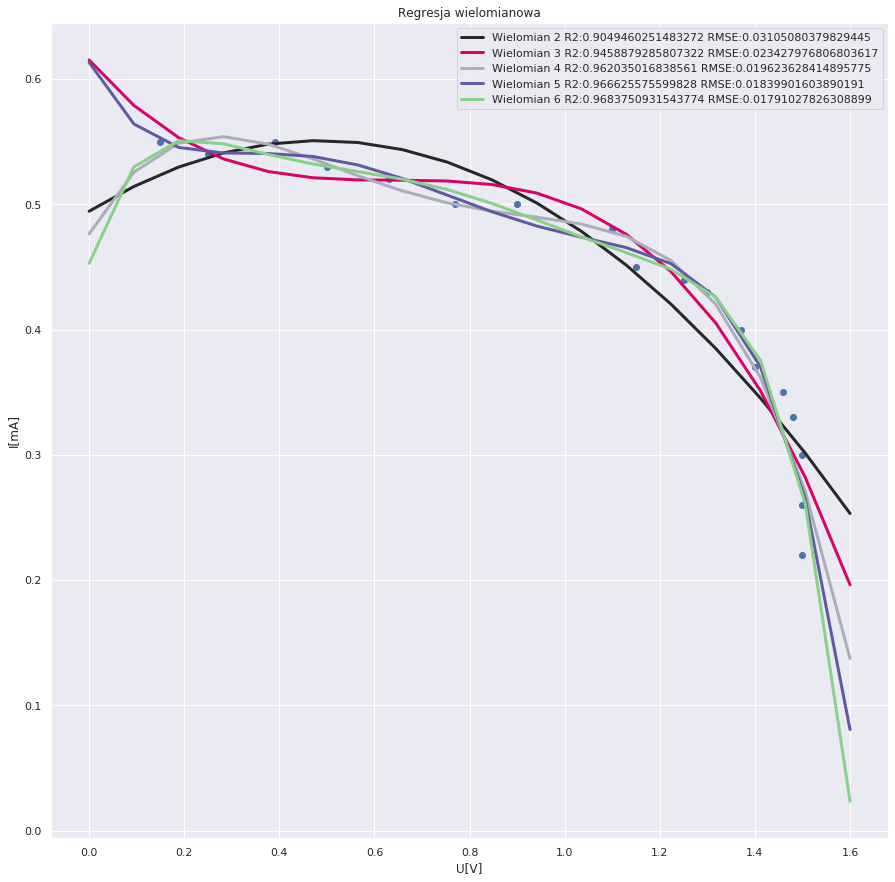

In [4]:
y = df['I[mA]'].to_numpy()
x = df["U[v]"].to_numpy()
line = np.linspace(0, 1.6, y.size)
create_plot_for_poly(x, y, line)

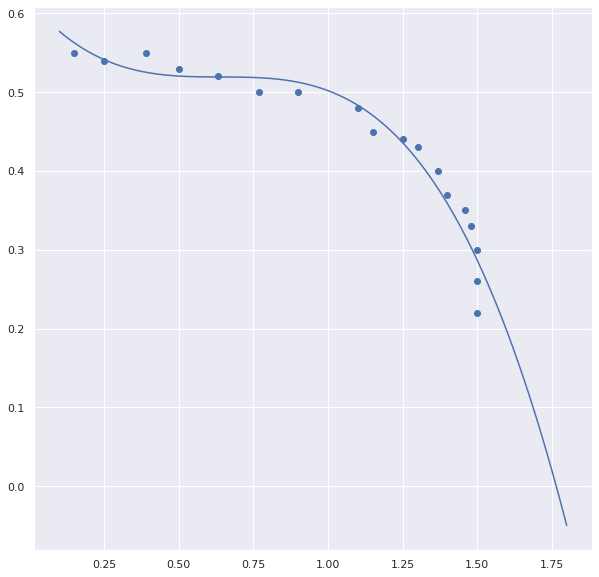

-0.363812406543338*x**3 + 0.698396836160989*x**2 - 0.447935110096609*x + 0.61525395081823

In [5]:
line = np.linspace(0.1, 1.8, 200)
model = np.poly1d(np.polyfit(x,y, 3))
plot_model(x, y, model, line)
print_model(model)

In [6]:
calculate_and_print_results(model)


,U_max [V],I_max [mA],I_sc [mA],U_oc [V],FF,P_max [W],η [%]
0,1.2,0.454755,0.615254,1.764954,0.502541,0.545707,4.597359
